## This is just rough implementation of HDBSCAN in Jupyter

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.30, 's' : 80, 'linewidths':0}

In [2]:
data = np.load('clusterable_data.npy')

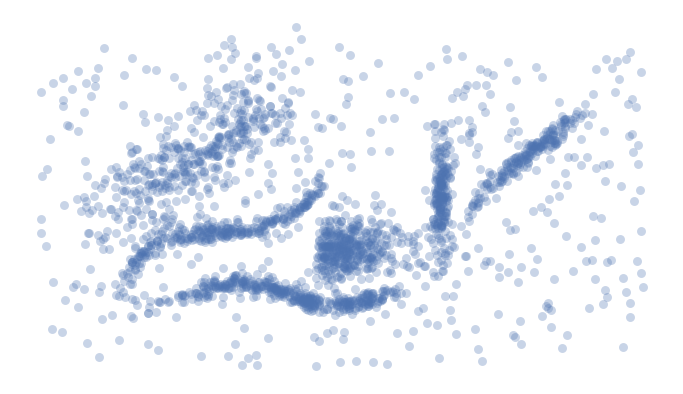

In [3]:
plt.figure(figsize=(12,7))
plt.scatter(data[:,0], data[:,1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
frame.axis("off");

In [4]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette("deep", np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.figure(figsize=(12,7))
    plt.scatter(data[:,0], data[:,1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(0,0,'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14,transform=frame.transAxes)
    frame.axis("off")
    plt.show()
    return labels

### A piece of advice to install HDBSCAN package, install via following code in conda

conda install -c conda-forge hdbscan

In [9]:
import hdbscan

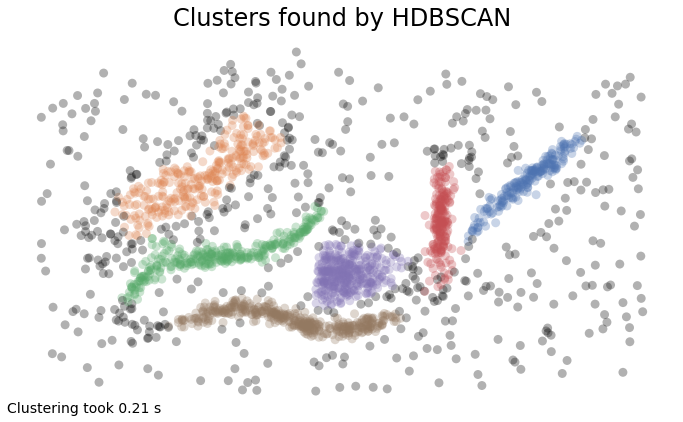

array([ 5,  5,  5, ..., -1, -1,  5], dtype=int64)

In [10]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

In [11]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)

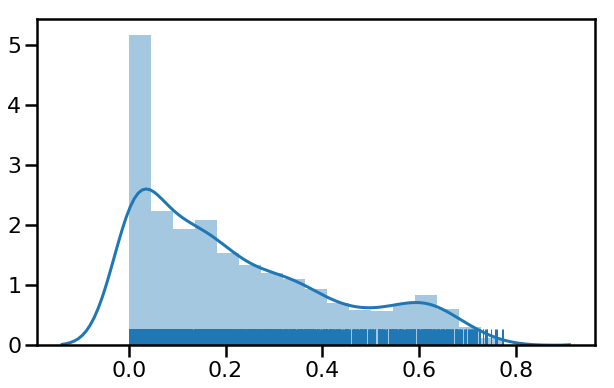

In [12]:
plt.figure(figsize=(10,6))

sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)
plt.show()

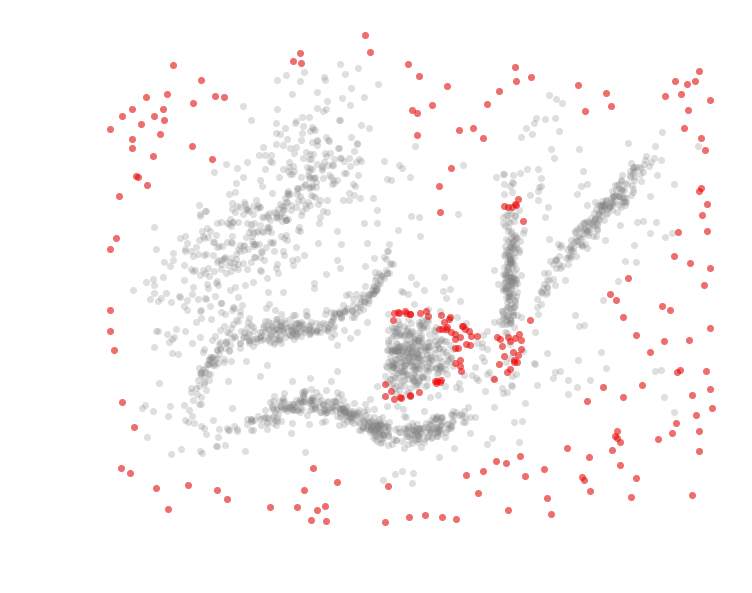

In [13]:
plt.figure(figsize=(12,10))

threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*data.T, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(*data[outliers].T, s=50, linewidth=0, c='red', alpha=0.5)

frame = plt.gca()
frame.axis("off")
plt.show()

### Note that not only are the outlying border points highlighted as outliers, but points at the edge of the central ball like cluster, and just below the vertical band cluster, are also designated as outliers. This is because those two clusters are extremely dense, and the points at the edge of this cluster are close enough to the cluster that they should be part of it, but far enough from the being core parts of the cluster that they are extremely unlikely and hence anomalous.